## Load Breast Cancer Dataset

In [3]:
from sklearn.datasets import load_breast_cancer #import module

print(load_breast_cancer().DESCR) #akses description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

## Binary Classification

In [318]:
from sklearn.model_selection import train_test_split #Import module

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25, #porsi untuk testing datasetnya adalah 25%,dan sisa 75%nya untuk training set
                                                    random_state=0) 

print(X_train)
print(y_train)

[[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1
 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 

In [319]:
model.score(X_test, y_test)

0.958041958041958

In [320]:
from sklearn.linear_model import LogisticRegression

binary = LogisticRegression()

binary.fit(X_train, y_train)

binary.score(X_test, y_test)

y_pred = binary.predict(X_test)
print(f'Performance : {binary.score(X_test, y_test)}')

Performance : 0.9440559440559441


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


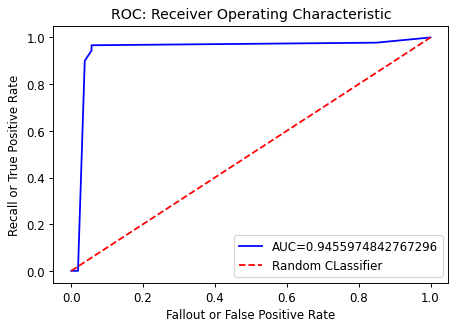

In [321]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

## Naive Bayes Classification

In [322]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% dari dataset kita akan kita alokasikan untuk testing dataset,sedangkan 80%nya akan kita gunakan sebagai training dataset
                                                    random_state=0)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)


### Accuracy Score

In [323]:
from sklearn.naive_bayes import GaussianNB #NB=Naive Bayes
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train) #method fit
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

In [351]:
model.score(X_test, y_test)

0.935672514619883

In [352]:
from sklearn.naive_bayes import GaussianNB

naivebayes = GaussianNB()

naivebayes.fit(X_train, y_train)

print(f' Performance : {naivebayes.score(X_test, y_test)}')

 Performance : 0.9239766081871345


### Visualisasi Model

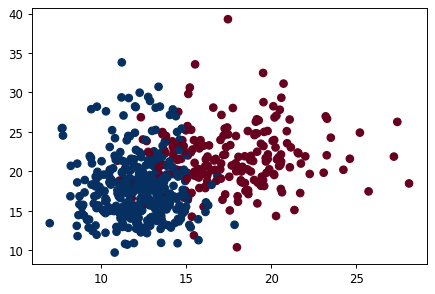

In [353]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [380]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test) #prediksi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Support Vector Machine (SVM) Classification

In [381]:
from sklearn.svm import SVC #import module

model = SVC(random_state=0)
model.fit(X_train, y_train) #traning model

SVC(random_state=0)

In [502]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [383]:
from sklearn.svm import SVC

supportvector = SVC(probability = True, kernel = 'linear')

supportvector.fit(X_test, y_test)

print(f'Performance : {supportvector.score(X_test, y_test)}')

Performance : 0.9883040935672515


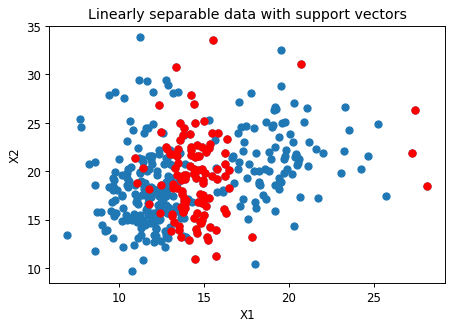

In [384]:
support_vectors = model.support_vectors_
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Predict

In [385]:
y_pred = model.predict(X_test)

### Visualisasi Model

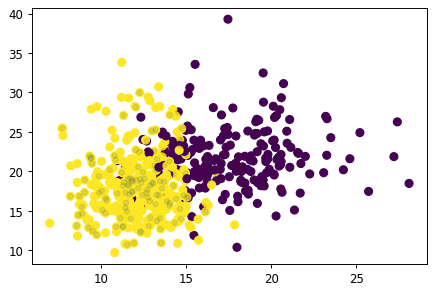

In [386]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=45)
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### Evaluasi Model

Kita akan melakukan evaluasi performa dengan memanfaatkan classification report

In [387]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        63
           1       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171



## Decision Tree Classification

In [487]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, #testing set akan menempati 30% dari total keseluruhan dataset
                                                    random_state=0)

In [488]:
from sklearn.tree import DecisionTreeClassifier #import module

model = DecisionTreeClassifier(max_depth=4) #max_depth = decision tree classifier yang kita hasilkan memiliki kedalaman maksimum 4 layer

model.fit(X_train, y_train) #method fit

DecisionTreeClassifier(max_depth=4)

In [489]:
from sklearn import tree

decisiontree = DecisionTreeClassifier(max_depth=4)

decisiontree.fit(X_train, y_train)

decisiontree.score(X_test, y_test)

y_pred = decisiontree.predict(X_test)
print(f'Performance : {decisiontree.score(X_test, y_test)}')

Performance : 0.935672514619883


### Visualisasi Model

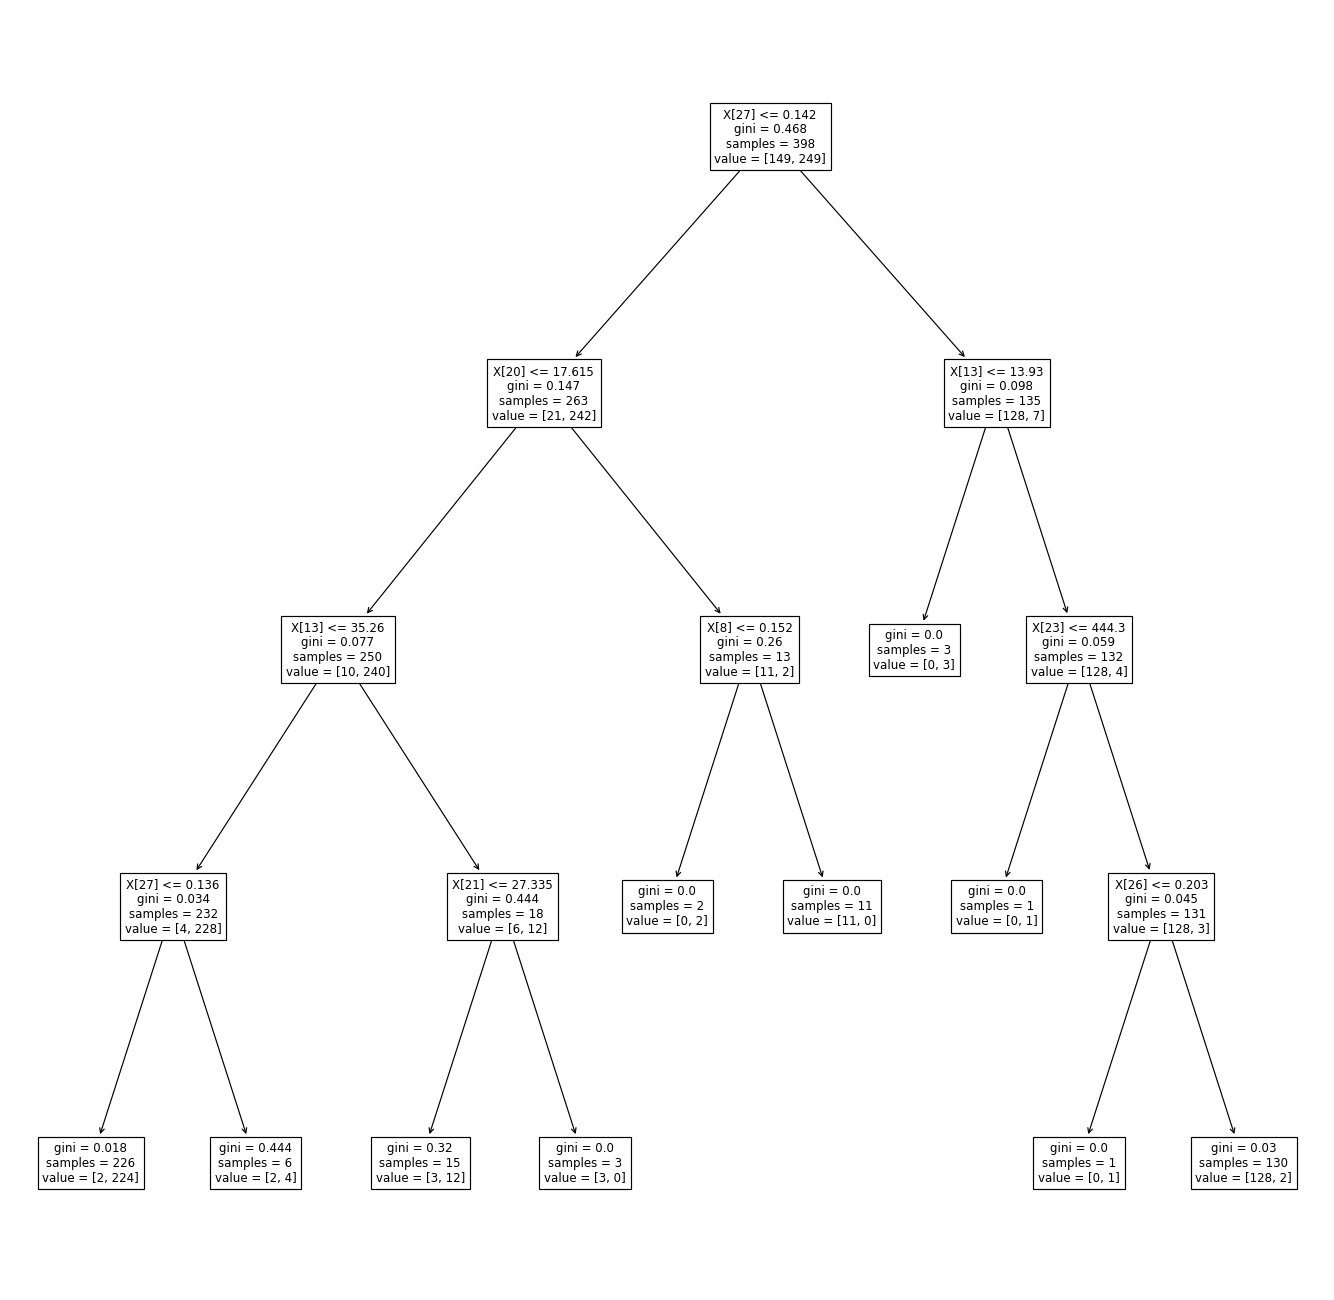

In [490]:
import matplotlib.pyplot as plt #import module
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(20, 20))
tree.plot_tree(model, fontsize=10)
plt.show()

### Evaluasi Model

In [491]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test) #prediksi

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## Random Forest Classification

In [492]:
from sklearn.model_selection import train_test_split #import module

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, #testing set akan menempati 30% dari total keseluruhan dataset
                                                    random_state=0) #menjamin agar eksperimen kita ini bisa kita replicate dan menghasilkan nilai yang konsisten

In [493]:
model.score(X_test, y_test)

0.9415204678362573

In [494]:
from sklearn import ensemble

randomforest = ensemble.RandomForestClassifier(n_estimators = 50,
                                        random_state = 0)

randomforest.fit(X_train, y_train)

print(f'Performance : {randomforest.score(X_train, y_train)}')

Performance : 0.9974874371859297


### Evaluasi Model

In [495]:
from sklearn.metrics import classification_report #import module

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Five Classification Model

In [496]:
binary_prob = binary.predict_proba(X_test)
supportvector_prob = supportvector.predict_proba(X_test) 
naivebayes_prob = naivebayes.predict_proba(X_test) 
decisiontree_prob = decisiontree.predict_proba(X_test)
randomforest_prob = randomforest.predict_proba(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

In [497]:
binary = binary_prob[:, 1]
supportvector = supportvector_prob[:, 1]
naivebayes = naivebayes_prob[:, 1]
decisiontree = decisiontree_prob[:, 1]
randomforest = randomforest_prob[:, 1]

In [498]:
from sklearn.metrics import roc_curve, roc_auc_score

binary_auc = roc_auc_score(y_test, binary)
supportvector_auc = roc_auc_score(y_test, supportvector)
naivebayes_auc = roc_auc_score(y_test, naivebayes)
decisiontree_auc = roc_auc_score(y_test, decisiontree)
randomforest_auc = roc_auc_score(y_test, randomforest)

In [499]:
print(F'Key Binary Classification (BC) AUROC Value = {binary_auc}')
print(F'Support Vector Machine (SVM) AUROC Value = {supportvector_auc}')
print(F'Naive Bayes AUROC Value = {naivebayes_auc}')
print(F'Decision Tree AUROC Value = {decisiontree_auc}')
print(F'Random Forest AUROC Value = {randomforest_auc}')

Key Binary Classification (BC) AUROC Value = 0.9948559670781894
Support Vector Machine (SVM) AUROC Value = 0.9976484420928866
Naive Bayes AUROC Value = 0.998530276308054
Decision Tree AUROC Value = 0.9963256907701352
Random Forest AUROC Value = 0.9963256907701352


In [500]:
binary_fpr, binary_tpr, _ = roc_curve(y_test, binary)
supportvector_fpr, supportvector_tpr, _ = roc_curve(y_test, supportvector)
naivebayes_fpr, naivebayes_tpr, _ = roc_curve(y_test, naivebayes)
decisiontree_fpr, decisiontree_tpr, _ = roc_curve(y_test, decisiontree)
randomforest_fpr, randomforest_tpr, _ = roc_curve(y_test, randomforest)

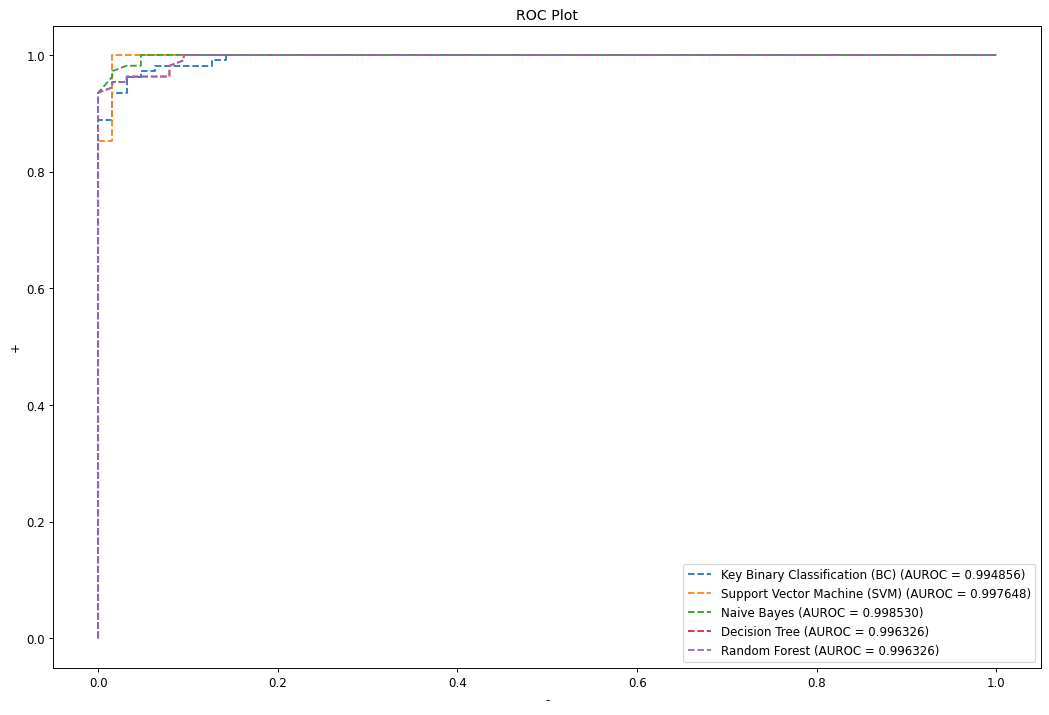

In [501]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))

plt.plot(binary_fpr, binary_tpr, linestyle = '--', label = 'Key Binary Classification (BC) (AUROC = %0.6f)' %binary_auc)
plt.plot(supportvector_fpr, supportvector_tpr, linestyle = '--', label = 'Support Vector Machine (SVM) (AUROC = %0.6f)' %supportvector_auc)
plt.plot(naivebayes_fpr, naivebayes_tpr, linestyle = '--', label = 'Naive Bayes (AUROC = %0.6f)' %naivebayes_auc)
plt.plot(decisiontree_fpr, decisiontree_tpr, linestyle = '--', label = 'Decision Tree (AUROC = %0.6f)' %decisiontree_auc)
plt.plot(randomforest_fpr, randomforest_tpr, linestyle = '--', label = 'Random Forest (AUROC = %0.6f)' %randomforest_auc)

plt.title('ROC Plot')

plt.xlabel('-')
plt.ylabel('+')

plt.legend()
plt.show()